In [10]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
X = np.random.randn(100, 2)
y = (X[:, 0] * X[:, 1] > 0).astype(int)
print(f"X: {X.shape} y: {y.shape}")

y = y.reshape(100, 1)

print(f"X: {X.shape} y: {y.shape}")

# Define the neural network architecture
input_size = 2
hidden_size1 = 8
hidden_size2 = 8
output_size = 1
learning_rate = 0.01

# Initialize weights and biases
np.random.seed(0)
weights_input_hidden1 = np.random.randn(input_size, hidden_size1)
bias_hidden1 = np.zeros((1, hidden_size1))
weights_hidden1_hidden2 = np.random.randn(hidden_size1, hidden_size2)
bias_hidden2 = np.zeros((1, hidden_size2))
weights_hidden2_output = np.random.randn(hidden_size2, output_size)
bias_output = np.zeros((1, output_size))

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative_notused(x):
    return x * (1 - x)

def sigmoid_derivative(x):
  return sigmoid(x) * (1 - sigmoid(x))
    
def relu(inputs):
    return np.maximum(0, inputs)
    
def relu_derivative(self, dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0
    return dZ
    
# Training loop
num_epochs = 10000
losses = []


X: (100, 2) y: (100,)
X: (100, 2) y: (100, 1)


Epoch 0: Loss = 0.18553020691029887
Epoch 1000: Loss = 0.2073830546094956
Epoch 2000: Loss = 0.3236671189493661
Epoch 3000: Loss = 0.2765143769494119
Epoch 4000: Loss = 0.629097062964275
Epoch 5000: Loss = 0.6413985434672037
Epoch 6000: Loss = 0.17847161997800362
Epoch 7000: Loss = 0.2647606816107703
Epoch 8000: Loss = 0.33548650283476955
Epoch 9000: Loss = 0.3663777611890469


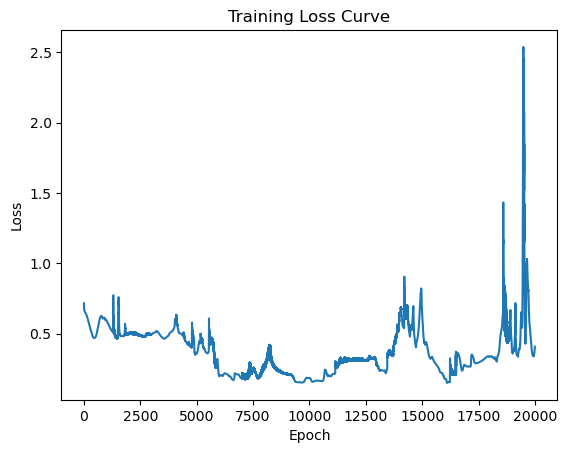

Predictions for test data:
[[0.72587806]
 [0.71129142]]


In [13]:
import warnings
warnings.filterwarnings('ignore')
for epoch in range(num_epochs):
    # Forward propagation
    hidden1_input = np.dot(X, weights_input_hidden1) + bias_hidden1
    hidden1_output = sigmoid(hidden1_input)
    
    hidden2_input = np.dot(hidden1_output, weights_hidden1_hidden2) + bias_hidden2
    hidden2_output = sigmoid(hidden2_input)
    
    output = np.dot(hidden2_output, weights_hidden2_output) + bias_output
    output_prob = sigmoid(output)
    #print(f"output_prob: {output_prob.shape}")

    # Calculate the loss (binary cross-entropy)
    loss = -np.mean(y * np.log(output_prob) + (1 - y) * np.log(1 - output_prob))
    losses.append(loss)

    # Backpropagation
    d_output = output_prob - y
    #print(f"weights_hidden2_output:{d_output.shape} hidden2_output:{weights_hidden2_output.shape}")
    d_hidden2 = d_output.dot(weights_hidden2_output.T) * sigmoid_derivative(hidden2_output)
    d_hidden1 = d_hidden2.dot(weights_hidden1_hidden2.T) * sigmoid_derivative(hidden1_output)

    weights_hidden2_output -= hidden2_output.T.dot(d_output) * learning_rate
    bias_output -= np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_hidden1_hidden2 -= hidden1_output.T.dot(d_hidden2) * learning_rate
    bias_hidden2 -= np.sum(d_hidden2, axis=0, keepdims=True) * learning_rate
    weights_input_hidden1 -= X.T.dot(d_hidden1) * learning_rate
    bias_hidden1 -= np.sum(d_hidden1, axis=0, keepdims=True) * learning_rate

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {loss}")

# Plot the loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

# Generate some test data for predictions
X_test = np.array([[1.2, 1.3], [-1.2, -1.3]])

# Forward propagation for test data
hidden1_input_test = np.dot(X_test, weights_input_hidden1) + bias_hidden1
hidden1_output_test = sigmoid(hidden1_input_test)

hidden2_input_test = np.dot(hidden1_output_test, weights_hidden1_hidden2) + bias_hidden2
hidden2_output_test = sigmoid(hidden2_input_test)

output_test = np.dot(hidden2_output_test, weights_hidden2_output) + bias_output
output_prob_test = sigmoid(output_test)

print("Predictions for test data:")
print(output_prob_test)
